# <center> MATH&ML-8. Алгоритмы на основе деревьев решений
---

### 2. Деревья решений в контексте задач классификации и регрессии

##### ГЕОМЕТРИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ ДЕРЕВА РЕШЕНИЙ

Посмотрим на **пример** разделяющей поверхности дерева решений в случае задачи регрессии

Воспользуемся данными о недвижимости в штате Айова из Ames Housing Dataset.

Для примера визуализации из всех признаков, описывающих объекты недвижимости, мы выберем:

* `Lot_Frontage` — ширина фасада;
* `Lot_Area` — площадь объекта недвижимости.

Необходимо предсказать стоимость недвижимости (`Sale_Price`). 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree

In [2]:
# Создаём обучающую выборку
ames_data = pd.read_csv('data/AmesHousing.csv')
ames_data = ames_data[(ames_data['Lot Frontage'] <=150) & (ames_data['Lot Area'] <=20000)]
X = ames_data[['Lot Frontage', 'Lot Area']]
y = ames_data['SalePrice']

In [3]:
# Инициализируем модель дерева решений с максимальной глубиной 3 и обучаем её
dt_reg = tree.DecisionTreeRegressor(max_depth=3)
dt_reg.fit(X.values, y)

DecisionTreeRegressor(max_depth=3)

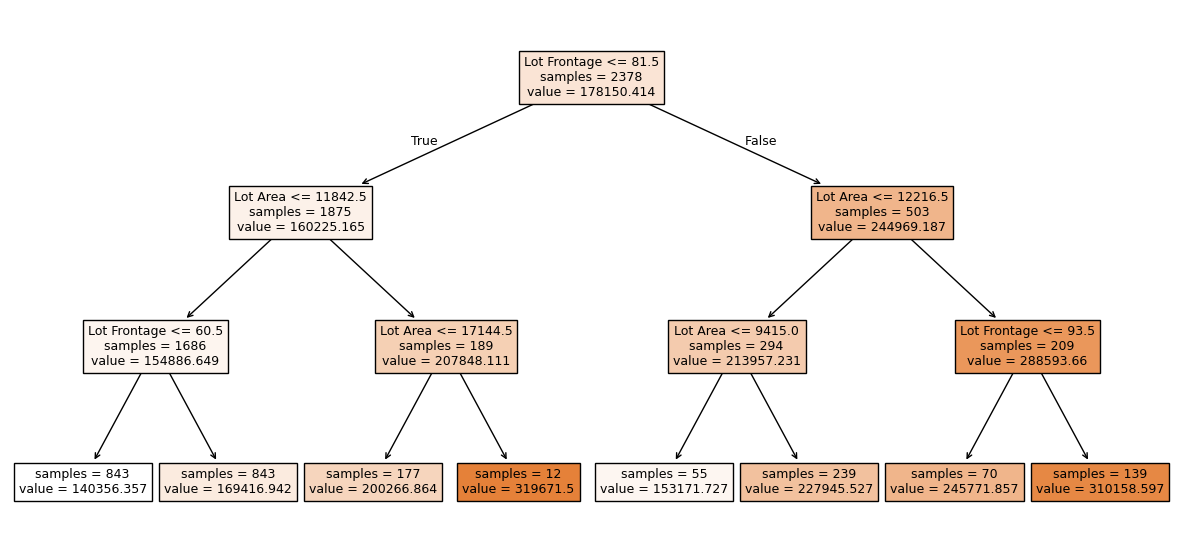

In [4]:
# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    dt_reg, #дерево решений 
    feature_names=list(X.columns), #имена факторов
    filled=True, #расцветка
    impurity=False, #отображать ли неоднородность
);

Построим диаграмму рассеяния и визуализируем то, как дерево решений разделяет пространство факторов на прямоугольные области. Для этого шага мы реализовали функцию `plot_decision_bound_regression()`:

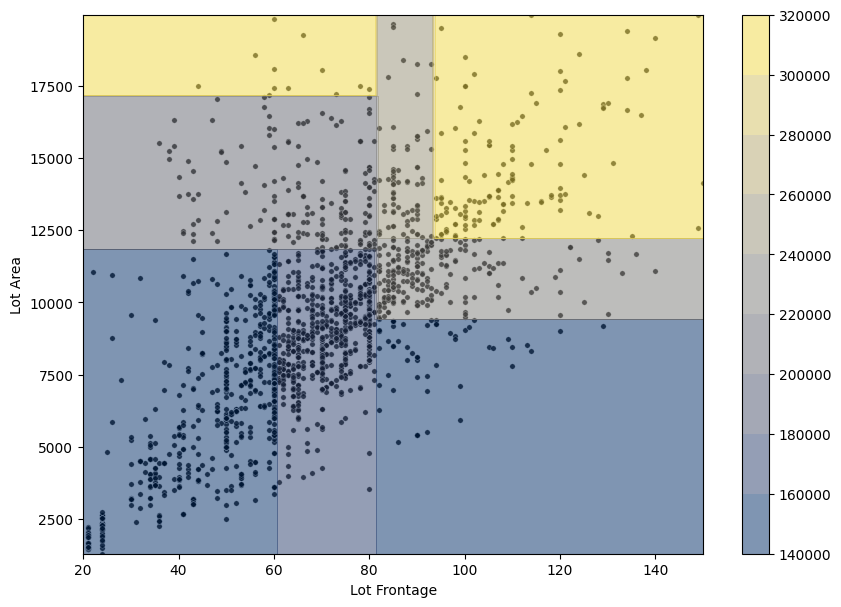

In [5]:
def plot_decision_bound_regression(X, y, model, fig):
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 1)
    )
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    y_pred = model.predict(X_net)
    y_pred = y_pred.reshape(xx1.shape)
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], s=15, color='black', alpha=0.8)
    contour = plt.contourf(xx1, xx2, y_pred, 10, cmap='cividis', alpha=0.5)
    fig.colorbar(contour)

# Визуализируем разделяющую поверхность дерева решений
fig = plt.figure(figsize = (10, 7))
plot_decision_bound_regression(X, y, dt_reg, fig)

Посмотрим на **пример** разделяющей поверхности дерева решений в случае задачи классификации

Воспользуемся данными о банкнотах из Banknote Authentication Dataset.

В качестве примера для визуализации из всех характеристик, описывающих изображения банкнот, будем использовать:

* `Variance` (дисперсию);
* `Skewness` (асимметрию).

Наша цель — предсказать, является ли банкнота фальшивой (`Class`): 1 — фальшивая, 0 — подлинная. Файл с данными вы можете скачать здесь.

In [6]:
# Создаём обучающую выборку    
bill_data = pd.read_csv('data/bill_authentication.csv')
X = bill_data[['Variance', 'Skewness']]
y = bill_data['Class']

In [7]:
# Инициализируем модель дерева решений с максимальной глубиной 4 и обучаем её
dt_clf = tree.DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X.values, y)

DecisionTreeClassifier(max_depth=4)

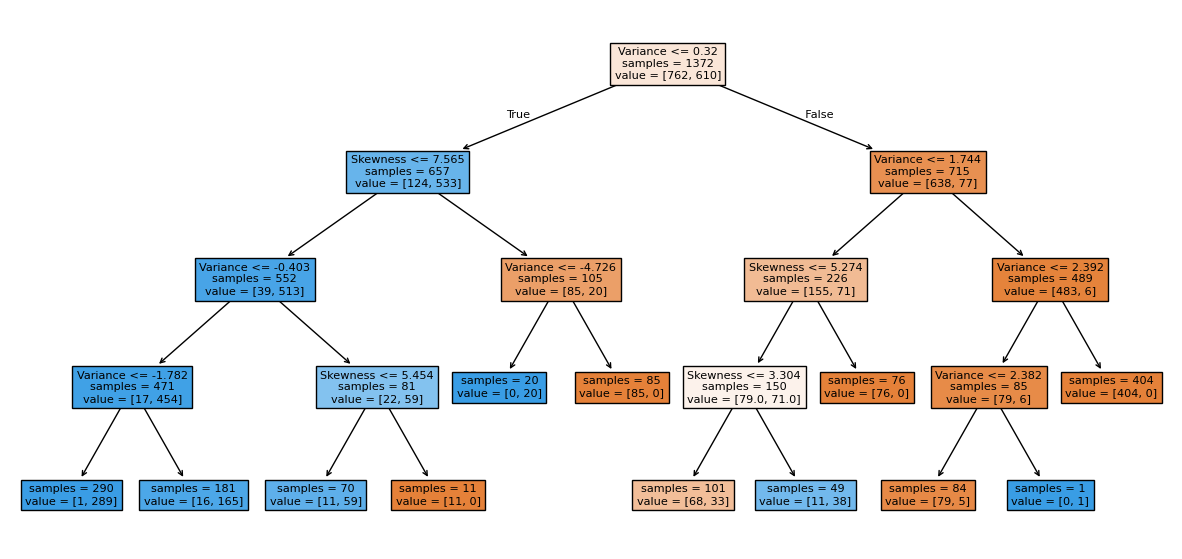

In [8]:
# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    dt_clf, #дерево решений
    feature_names=list(X.columns), #имена факторов
    filled=True, #расцветка
    impurity=False, #отображать ли неоднородность
);

Построим диаграмму рассеяния и визуализируем то, как дерево решений разделяет пространство факторов на прямоугольные области. Для этого шага мы реализовали функцию `plot_decision_bound_classification()`:

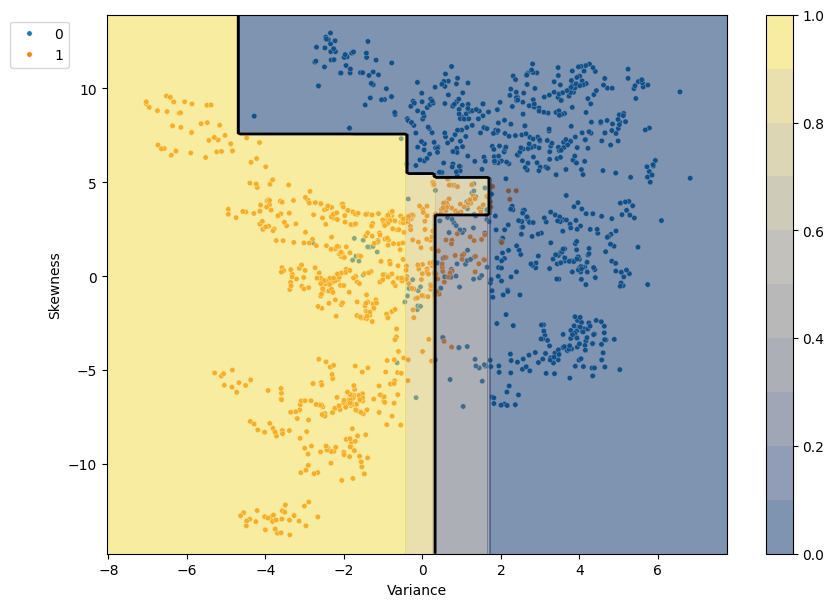

In [9]:
def plot_decision_bound_classification(X, y, model, fig):
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    probs = model.predict_proba(X_net)[:, 1]
    probs = probs.reshape(xx1.shape)
    
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, s=15, alpha=1)
    contour = plt.contourf(xx1, xx2, probs, 10, cmap='cividis', alpha=0.5)
    bound = plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    fig.colorbar(contour)
    plt.legend(bbox_to_anchor=(-0.05, 1))
# Визуализируем разделяющую поверхность дерева решений
fig = plt.figure(figsize = (10, 7))
plot_decision_bound_classification(X, y, dt_clf, fig)

---

### 3. Алгоритм CART: параметры разбиения

Псевдокод алгоритма определения пороговых значений для фактора $x_j$

```Python
min_loss = inf
optimal_split_params = None
for j in range(M):
    thresholds = find_candidates_for_thresholds(X[:, j], y)
    for t in thresholds:
        split_params = (j, t)
        loss = calculate_loss(X, y, split_params)
        if loss < min_loss:
            min_loss = loss
            optimal_split_params = split_params
```

In [10]:
data = pd.DataFrame({
    'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31],
    'income': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102],
    'loan': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
})
x = data['age']
y = data['loan']

In [11]:
x = x.sort_values().drop_duplicates()
print(x.values)
# [17 18 20 25 29 31 38 49 55 64]

[17 18 20 25 29 31 38 49 55 64]


In [12]:
x_roll_mean = x.rolling(2).mean()
print(x_roll_mean.values)
# [ nan 17.5 19.  22.5 27.  30.  34.5 43.5 52.  59.5]

[ nan 17.5 19.  22.5 27.  30.  34.5 43.5 52.  59.5]


In [13]:
x_roll_mean = x_roll_mean.dropna()
print(x_roll_mean.values)
 
# [17.5 19.  22.5 27.  30.  34.5 43.5 52.  59.5]

[17.5 19.  22.5 27.  30.  34.5 43.5 52.  59.5]


In [14]:
y = y[x_roll_mean.index]
y_roll_mean = y.diff()
candidates = x_roll_mean[y_roll_mean != 0]
print(candidates.values)
# [17.5 19.  22.5 30.  34.5 43.5]

[17.5 19.  22.5 30.  34.5 43.5]


Удобнее будет оформить полученный алгоритм в виде функции `find_candidates_for_thresholds()`. Она будет принимать на вход фактор `x` и целевую переменную `y` и возвращать кандидатов в пороговые значения для y в виде *numpy*-массива:

In [15]:
def find_candidates_for_thresholds(x, y):
    x = x.sort_values().drop_duplicates()
    x_roll_mean = x.rolling(2).mean().dropna()
    y = y[x_roll_mean.index]
    y_roll_mean = y.diff()
    candidates = x_roll_mean[y_roll_mean != 0]
    return candidates.values

In [16]:
print(find_candidates_for_thresholds(data['age'], data['loan']))
print(find_candidates_for_thresholds(data['income'], data['loan']))
# [17.5 19.  22.5 30.  34.5 43.5]
# [23.5 34.5 36.5 48.  64.5 72. ]

[17.5 19.  22.5 30.  34.5 43.5]
[23.5 34.5 36.5 48.  64.5 72. ]


In [17]:
# Задание 3.4
# Дана часть датасета о домах в штате Айова, состоящая из 15 наблюдений:
ames_data = pd.read_csv('data/AmesHousing.csv')
ames_data = ames_data[(ames_data['Lot Frontage'] <=150) & (ames_data['Lot Area'] <=20000)]
ames_sample = ames_data[['Lot Frontage', 'Lot Area', 'SalePrice']].sample(
    n=15, #количество объектов
    random_state=42, #генератор случайных чисел
    ignore_index=True #сбрасываем счетчик индекса
)
# Найдите уникальных кандидатов на пороговое значение t для фактора x1 (Lot Frontage)
print(find_candidates_for_thresholds(ames_sample['Lot Frontage'], ames_sample['SalePrice']))

[ 53.  58.  61.  65.  69.  71.  76.  86.  94. 101.]


In [18]:
# Задание 3.5
# Для части датасета о домах в Айове из предыдущего задания найдите уникальных кандидатов на пороговое значение t для фактора x2 (Lot Area)
print(find_candidates_for_thresholds(ames_sample['Lot Area'], ames_sample['SalePrice']))

[ 5508.   7153.   7425.   7949.   8405.5  8526.5  8850.   9137.5  9466.
 10051.5 10507.  10834.  11365.  12288. ]


---

### 4. Алгоритм CART: неоднородность, критерии информативности

##### ЗАДАЧА РЕГРЕССИИ

In [19]:
def squared_error(y):
    y_pred = y.mean()
    return ((y - y_pred) ** 2).mean()

In [20]:
def split(X, y, split_params):
    j, t = split_params
    predicat = X.iloc[:, j] <= t
    X_left, y_left = X[predicat], y[predicat]
    X_right, y_right = X[~predicat], y[~predicat]
    return X_left, y_left, X_right, y_right

In [21]:
def calculate_weighted_impurity(X, y, split_params, criterion):
    X_left, y_left, X_right, y_right = split(X, y, split_params)
    N, N_left, N_right  = y.size, y_left.size, y_right.size
    score = N_left / N * criterion(y_left) + N_right / N * criterion(y_right)
    return score

In [22]:
def best_split(X, y, criterion):
    M = X.shape[1]
    min_weighted_impurity = np.inf
    optimal_split_params = None
    for j in range(M):
        thresholds = find_candidates_for_thresholds(X.iloc[:, j], y)
        for t in thresholds:
            split_params = (j, t)
            weighted_impurity = calculate_weighted_impurity(X, y, split_params, criterion)
            if weighted_impurity < min_weighted_impurity:
                min_weighted_impurity = weighted_impurity
                optimal_split_params = split_params
    return optimal_split_params

Протестируем функцию best_split() — возьмём датасет из нашего последнего примера:

In [23]:
data = pd.DataFrame({
    'x1': list(range(1, 16)),
    'y': [1, 1.2, 1.4, 1.1, 1, 5.5, 6.1, 6.7, 6.4, 6, 6, 3, 3.2, 3.1, 3]
})
X = data[['x1']]
y = data['y']

In [24]:
# Находим оптимальные параметры разбиения
optimal_split_params = best_split(X, y, criterion=squared_error)
print('Optimal j: {}'.format(optimal_split_params[0]))
print('Optimal t: {}'.format(optimal_split_params[1]))

# Optimal j: 0
# Optimal t: 5.5

Optimal j: 0
Optimal t: 5.5


Если мы обучим на наших данных решающий пень из библиотеки sklearn с критерием информативности `'squared_error'`  и параметром `random_state = 0`, а затем визуализируем его в виде графа, то получим ровно тот же результат:

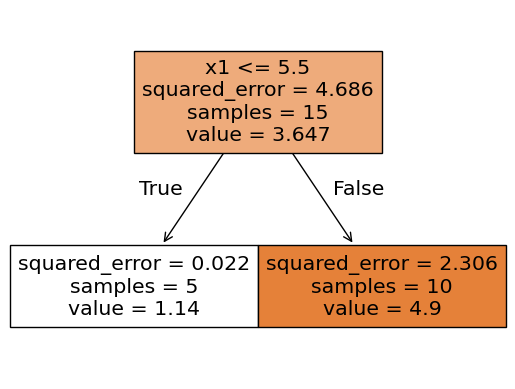

In [25]:
# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем её
dt = tree.DecisionTreeRegressor(
    max_depth=1, #глубина
    criterion='squared_error', #критерий информативности
    random_state=0 #генератор случайных чисел
)

dt.fit(X, y)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=list(X.columns), #названия факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

j = Lot Frontage, t = 71.0
G(Q,w) = 1414654917


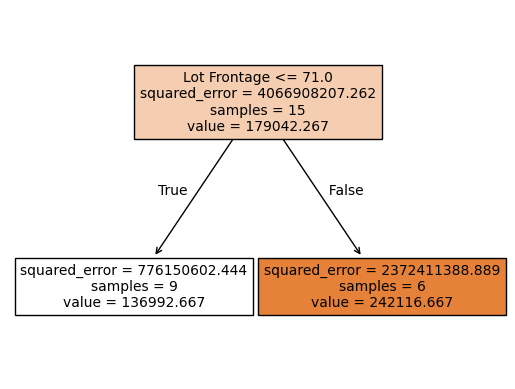

In [26]:
# Задание 4.3
# Дана часть датасета о домах в штате Айова, состоящая из 15 наблюдений:
ames_data = ames_data[(ames_data["Lot Frontage"] <=150) & (ames_data["Lot Area"] <=20000)]
ames_sample = ames_data[["Lot Frontage", "Lot Area", "SalePrice"]].sample(
    n=15, random_state=42, ignore_index=True
)
X = ames_sample[["Lot Frontage", "Lot Area"]]
y = ames_sample["SalePrice"]
# Найдите оптимальные для построения решающего пня параметры разбиения j и t. В качестве критерия информативности используйте квадратичную ошибку
# Если вы хотите попрактиковаться в использовании формул, можно проделать операцию построения дерева решений вручную
# Примечание. Для самопроверки обучите на данной части датасета дерево решений из sklearn с максимальной глубиной 1, 
# критерием информативности 'squared_error' и параметром random_state = 0 и визуализируйте его граф
osp_r = best_split(X, y, squared_error)
print(f'j = {X.columns[osp_r[0]]}, t = {osp_r[1]}')

dtr = tree.DecisionTreeRegressor(max_depth=1,
                                  criterion='squared_error',
                                  random_state=0)
dtr.fit(X, y)
tree.plot_tree(dtr,
               feature_names=X.columns,
               filled=True);

print(f'G(Q,w) = {calculate_weighted_impurity(X, y, osp_r, squared_error):.0f}')

##### ЗАДАЧА КЛАССИФИКАЦИИ

Сам алгоритм не изменится — просто вместо расчёта квадратичной ошибки мы будем рассчитывать критерий информативности для классификации, например энтропию.

In [27]:
def entropy(y):
    p = y.value_counts(normalize=True)
    entropy = -np.sum(p * np.log2(p))
    return entropy

Для вызова самой функции `best_split()` нужно будет только поменять критерий информативности (параметр `criterion`). Пример:
```Python
optimal_params = best_split(X, y, criterion=entropy)
```


j = Skewness, t = 3.221
G(Q,w) = 0.46


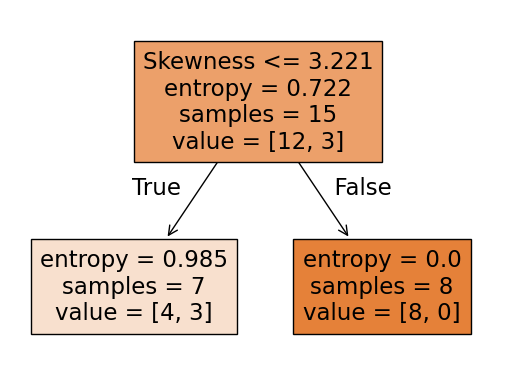

In [28]:
# Задание 4.5
# Дана часть датасета о банкнотах, состоящая из 15 наблюдений:
bill_data = pd.read_csv('data/bill_authentication.csv')
bill_sample = bill_data[['Variance', 'Skewness', 'Class']].sample(
    n=15, 
    random_state=42, 
    ignore_index=True
)
# Создаём обучающую выборку
X = bill_sample[['Variance', 'Skewness']]
y = bill_sample['Class']
# Найдите оптимальные для построения решающего пня параметры разбиения j и t. Для этого воспользуйтесь функцией best_split(), которую мы реализовали ранее. 
# В качестве критерия информативности используется энтропию Шеннона.
# Примечание. Для самопроверки обучите на данной части датасета дерево решений из sklearn с максимальной глубиной 1, 
# критерием информативности 'entropy' и параметром random_state = 0 и визуализируйте его граф.
osp_c = best_split(X, y, entropy)
print(f'j = {X.columns[osp_c[0]]}, t = {osp_c[1]:.3f}')

dtc = tree.DecisionTreeClassifier(max_depth=1,
                                  criterion='entropy',
                                  random_state=0)
dtc.fit(X, y)
tree.plot_tree(dtc,
               feature_names=X.columns,
               filled=True);

print(f'G(Q,w) = {calculate_weighted_impurity(X, y, osp_c, entropy):.2f}')

---
### 5. Алгоритм CART: рекурсия, критерии остановки

Для начала создадим вспомогательный класс вершины. У него будут следующие атрибуты:

* `left` — ссылка на левого потомка;
* `right` — ссылка на правого потомка;
* `value` — ответ алгоритма;
* `split_params` — параметры разбиения (сплита);
* `impurity` — неоднородность в вершине (пригодится для расчёта важности признаков);
* `samples` — количество объектов, попавших в вершину;
* `is_leaf` — булева переменная, которая указывает, является ли вершина листовой.
По умолчанию все параметры заданы как `None`.

In [29]:
class Node:
    def __init__(self, left=None, 
                 right=None, value=None, 
                 split_params=None, impurity=None,
                 samples=None, is_leaf=False):
        self.left = left
        self.right = right
        self.split_params = split_params
        self.value = value
        self.impurity = impurity
        self.samples = samples
        self.is_leaf = is_leaf

* Если вершина является корневой или внутренней, для неё устанавливаются ссылки на потомков, параметры разбиения, неоднородность и количество объектов.
* Если вершина является листовой, для неё указываются только ответ, неоднородность и количество объектов, а параметр `is_leaf` устанавливается в значение `True`.

In [30]:
def create_leaf_prediction(y):
    value = y.mode()[0]
    return value

In [31]:
def stopping_criterion(X, y, criterion):
    return criterion(y) == 0

In [32]:
def build_decision_tree(X, y, criterion):
    if stopping_criterion(X, y, criterion):
        value = create_leaf_prediction(y)
        node = Node(
            value=value, 
            impurity=criterion(y), 
            samples=y.size,
            is_leaf=True
        )
    else:
        split_params = best_split(X, y, criterion=criterion)
        X_left, y_left, X_right, y_right = split(X, y, split_params)
        left = build_decision_tree(X_left, y_left, criterion)
        right = build_decision_tree(X_right, y_right, criterion)       
        node = Node(
            left=left, right=right, 
            split_params=split_params, 
            impurity=criterion(y), 
            samples=y.size
        )
    
    return node

In [33]:
def print_decision_tree(node, depth=0):
    depth += 1
    if node.is_leaf:
        print('   ' * depth, 'class: {}'.format(node.value))
    else:
        print('   ' * depth, 'feature_{} <= {:.3f}:'.format(*node.split_params))
        print_decision_tree(node.left, depth=depth)
        print('   ' * depth, 'feature_{} > {:.3f}:'.format(*node.split_params))
        print_decision_tree(node.right, depth=depth)

Обучим наше дерево решений на игрушечном датасете о выдаче кредитов клиентам банка и напечатаем его. У нас есть два фактора: $x_1$ — возраст заёмщика, $x_2$ — доход заёмщика. Целевая переменная $y$ — бинарная (0 — кредит погашен, 1 — кредит не погашен).

In [34]:
# Объявляем функцию для вычисления энтропии
def entropy(y):
    p = y.value_counts(normalize=True)
    entropy = -np.sum(p * np.log2(p))
    return entropy

# Создаём обучающую выборку
data = pd.DataFrame({
    'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31],
    'income': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102],
    'loan': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
})
X = data[['age', 'income']]
y = data['loan']

# Строим дерево решений и выводим его на экран
decision_tree = build_decision_tree(X, y, criterion=entropy)
print_decision_tree(decision_tree)

    feature_0 <= 43.500:
       feature_1 <= 86.000:
          feature_0 <= 22.500:
             feature_0 <= 19.000:
                class: 1
             feature_0 > 19.000:
                class: 0
          feature_0 > 22.500:
             class: 1
       feature_1 > 86.000:
          class: 0
    feature_0 > 43.500:
       class: 0


Cравним наш результат с деревом решений из *sklearn*, напечатав его в текстовом виде с помощью функции `export_text()` из модуля *tree*. Не будем ограничивать глубину дерева, а в качестве значения параметра `random_state` возьмём `1000` для совпадения результатов:

In [35]:
# Создаём модель дерева решений
dt = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=1000 #генератор случайных чисел
)
dt.fit(X, y)
# Выводим дерево решений на экран в виде списка условий
print(tree.export_text(decision_tree=dt))

|--- feature_0 <= 43.50
|   |--- feature_1 <= 86.00
|   |   |--- feature_0 <= 22.50
|   |   |   |--- feature_0 <= 19.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  19.00
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  22.50
|   |   |   |--- class: 1
|   |--- feature_1 >  86.00
|   |   |--- class: 0
|--- feature_0 >  43.50
|   |--- class: 0



Построить дерево решений мало — нужно ещё научить его предсказывать целевую переменную для новых объектов. Для этого реализуем две функции:
* `predict_sample()` принимает на вход вершину и один объект из выборки `x`. Алгоритм предсказания следующий: нужно рекурсивно передвигаться по дереву на основе характеристик объекта (если $x[j]\leq t$ > — в левую вершину, иначе — в правую), а когда дойдём до листовой вершины, вернуть предсказание, которое присвоено этому листу (`value`).

In [36]:
def predict_sample(node, x):
    if node.is_leaf:
        return node.value
    j, t = node.split_params
    if x[j] <= t:
        return predict_sample(node.left, x)
    else:
        return predict_sample(node.right, x)

* `predict()` принимает на вход дерево решений и матрицу из объектов `X`, для которых нужно сделать предсказание. Внутри себя функция должна сделать предсказание для всех объектов из `X` — вызвать функцию `predict_sample()`. Результат оборачивается в список, а затем в *numpy*-вектор.

In [37]:
def predict(decision_tree, X):
    predictions = [predict_sample(decision_tree, x) for x in X.values]
    return np.array(predictions)

Проверим наши функции. Сделаем предсказание выплаты/невыплаты заёмщиком кредита для всех объектов из обучающей выборки:

In [38]:
# Предсказываем целевую переменную
y_pred = predict(decision_tree, X)
print('Predictions: {}'.format(y_pred))
# Predictions: [1 0 1 0 1 0 0 1 1 0]

Predictions: [1 0 1 0 1 0 0 1 1 0]


**Примечание.** Для задачи регрессии в коде изменятся две вещи:

1. Функция `create_leaf_prediction()`. Вместо модального значения классов в листьях рассчитывается среднее значение целевой переменной:
    ```Python
    def create_leaf_prediction(y):
        value = y.mean()
        return value
    ```
2. Функция для расчёта критерия информативности (параметр `criterion`). В качестве критерия можно взять, например, квадратичную ошибку:
    ```Python
    def squared_error(y):
        y_pred = y.mean()
        return ((y - y_pred) ** 2).mean()
    ```

    feature_1 <= 3.221:
       feature_0 <= 2.756:
          feature_0 <= -1.254:
             class: 0
          feature_0 > -1.254:
             feature_0 <= -0.063:
                class: 1
             feature_0 > -0.063:
                feature_0 <= 0.988:
                   class: 0
                feature_0 > 0.988:
                   class: 1
       feature_0 > 2.756:
          class: 0
    feature_1 > 3.221:
       class: 0


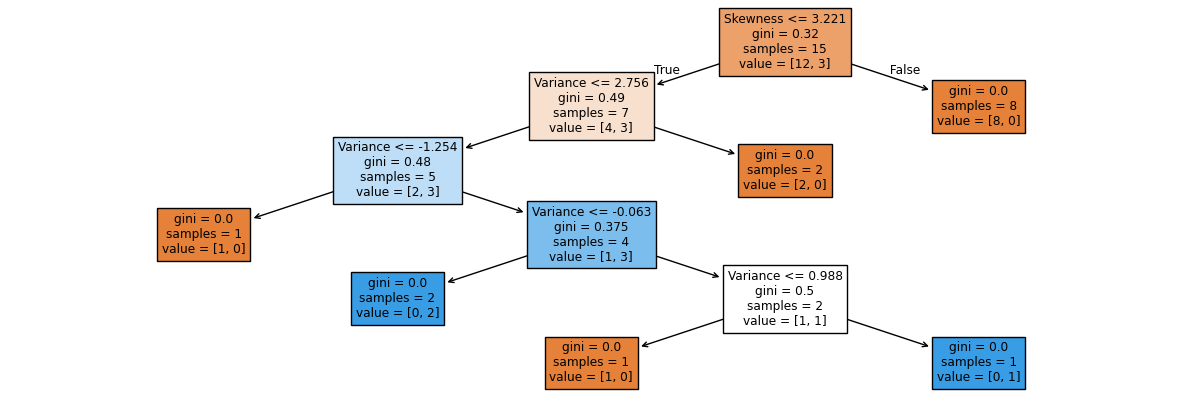

In [39]:
# Задание 5.3
# Дана часть датасета о банкнотах, состоящая из 15 наблюдений:
bill_data = pd.read_csv('data/bill_authentication.csv')
bill_sample = bill_data[['Variance', 'Skewness', 'Class']].sample(
    n=15, 
    random_state=42, 
    ignore_index=True
)
# Создаём обучающую выборку
X = bill_sample[['Variance', 'Skewness']]
y = bill_sample['Class']
# Постройте дерево решений на обучающей выборке с помощью функции build_decision_tree(). В качестве критерия информативности используйте энтропию Шеннона
# Примечание. Для самопроверки обучите на данной части датасета дерево решений с неограниченной максимальной глубиной и визуализируйте его граф. 
# Чтобы получить тот же результат, установите параметр random_state = 0.
dt_1 = build_decision_tree(X, y, entropy)
print_decision_tree(dt_1)

dt_2 = tree.DecisionTreeClassifier(random_state=0)
dt_2.fit(X, y)
fig = plt.figure(figsize=(15, 5))
tree.plot_tree(dt_2, feature_names=X.columns, filled=True);

##### КРИТЕРИИ ОСТАНОВКИ

In [40]:
data = pd.DataFrame({
    'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31],
    'income': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102],
    'y': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
})
# Создаём обучающую выборку
X = data[['age', 'income']]
y = data['y']

ДОСТИЖЕНИЕ ОДНОРОДНОСТИ

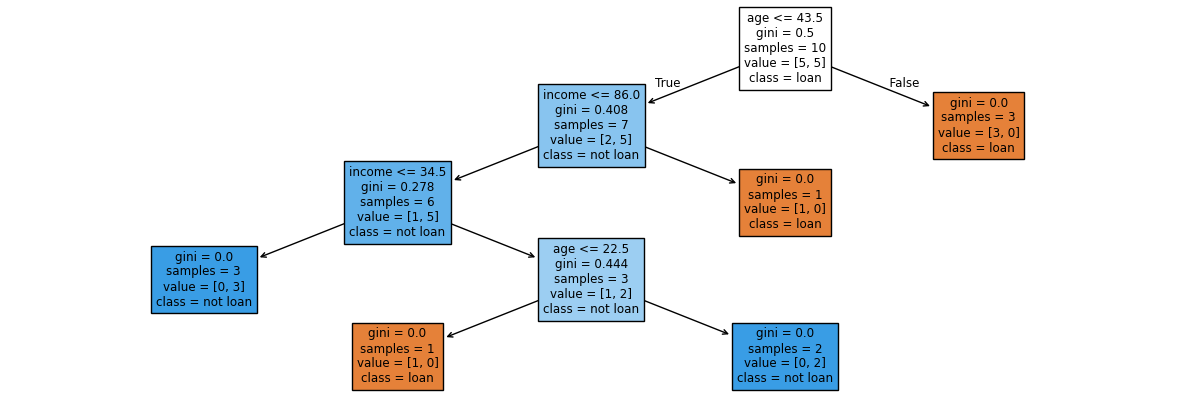

In [41]:
dt = tree.DecisionTreeClassifier(random_state=42)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 5))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

ОГРАНИЧЕНИЕ МАКСИМАЛЬНОЙ ГЛУБИНЫ ДЕРЕВА (ПАРАМЕТР `MAX_DEPTH`)

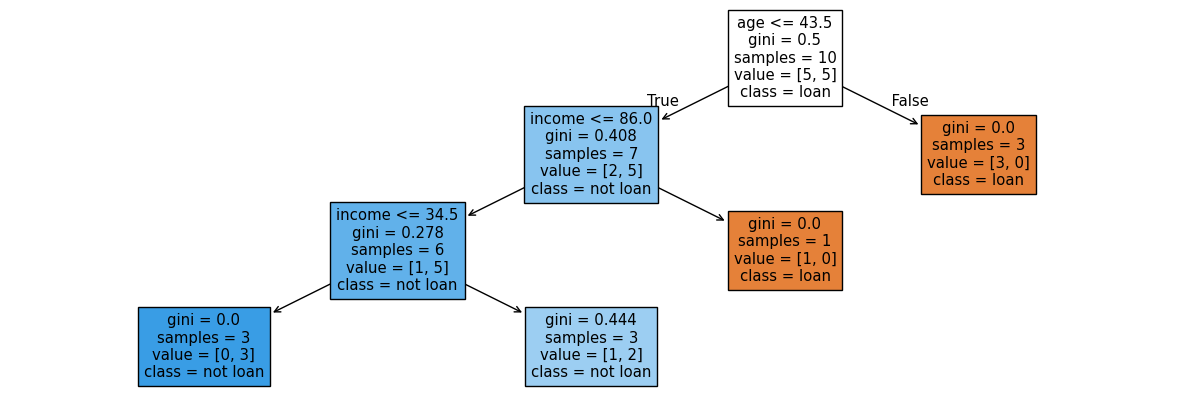

In [42]:
dt = tree.DecisionTreeClassifier(
    max_depth=3, 
    random_state=42
)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 5))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

ОГРАНИЧЕНИЕ МАКСИМАЛЬНОГО КОЛИЧЕСТВА ЛИСТЬЕВ В ДЕРЕВЕ (ПАРАМЕТР `MAX_LEAF_NODE`)

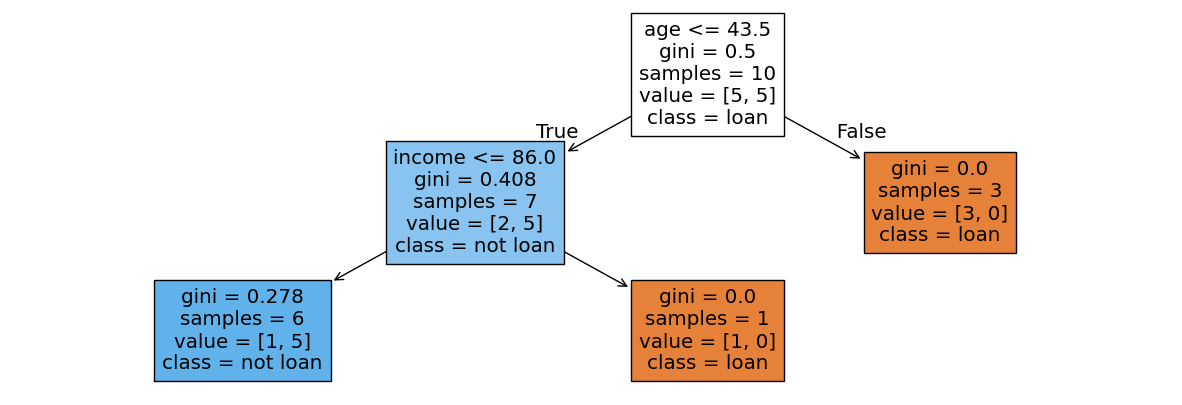

In [43]:
dt = tree.DecisionTreeClassifier(
    max_leaf_nodes=3, 
    random_state=42
)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 5))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

ОГРАНИЧЕНИЕ НА МИНИМАЛЬНОЕ КОЛИЧЕСТВО ОБЪЕКТОВ, ПРИ КОТОРЫХ ДОПУСКАЕТСЯ ВЕТВЛЕНИЕ ДЕРЕВА (ПАРАМЕТР `MIN_SAMPLES_SPLIT`)

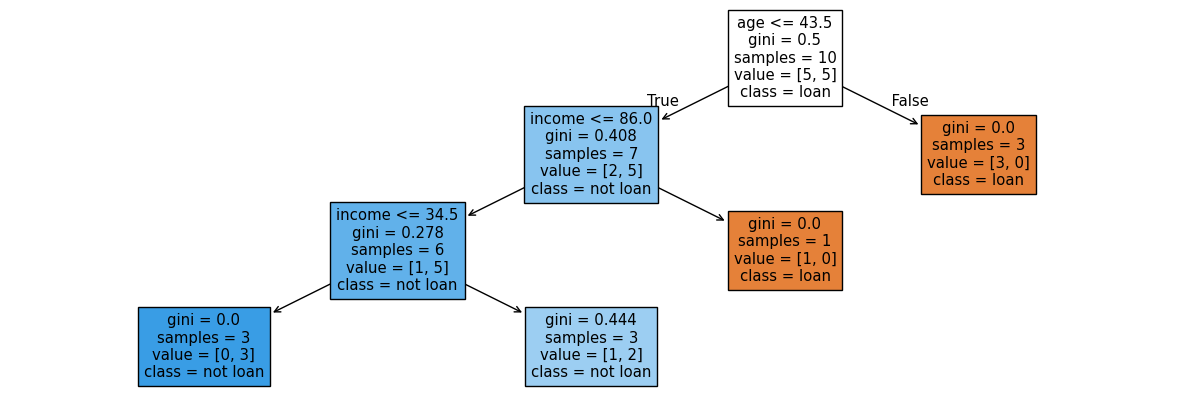

In [44]:
dt = tree.DecisionTreeClassifier(
    min_samples_split=6, 
    random_state=42
)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 5))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

ОГРАНИЧЕНИЕ НА МИНИМАЛЬНОЕ КОЛИЧЕСТВО ОБЪЕКТОВ, НЕОБХОДИМЫХ ДЛЯ СОЗДАНИЯ ЛИСТА (ПАРАМЕТР `MIN_SAMPLES_LEAF`)

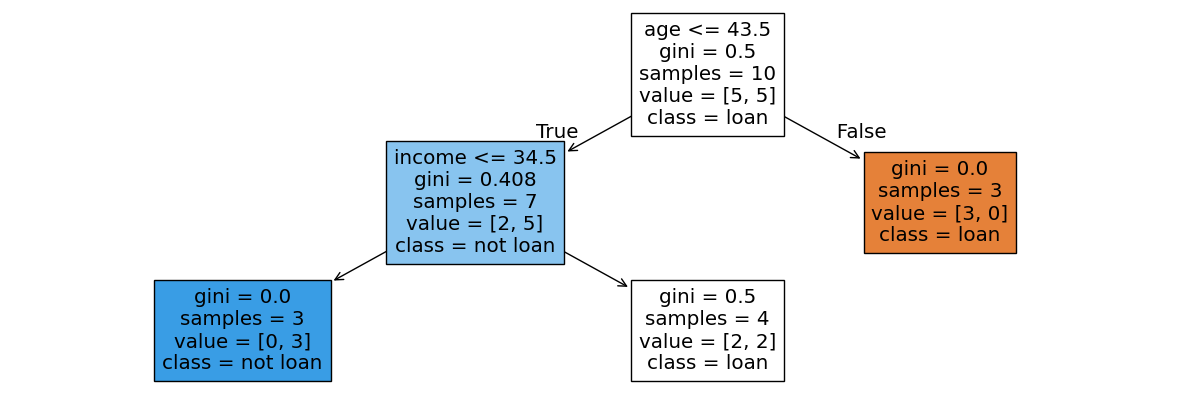

In [45]:
dt = tree.DecisionTreeClassifier(
    min_samples_leaf=3, 
    random_state=42
)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 5))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

Адаптируем наш метод построения дерева решений и введём новое ограничение на максимальную глубину дерева: в функции `stop_criterion()` и `build_decision_tree()` добавим параметр `max_depth`, а также счётчик глубины рекурсии `depth`:

In [46]:
def stopping_criterion(X, y, criterion, max_depth=None, depth=0):
    if max_depth is None:
        return (criterion(y) == 0) 
    else:
        return (criterion(y) == 0) or (depth > max_depth)
    
def build_decision_tree(X, y, criterion, max_depth=None, depth=0):
    depth += 1
    if stopping_criterion(X, y, criterion, max_depth, depth):
        value = create_leaf_prediction(y)
        node = Node(
            value=value, 
            impurity=criterion(y), 
            samples=y.size,
            is_leaf=True
        )
    else:
        split_params = best_split(X, y, criterion=entropy)
        X_left, y_left, X_right, y_right = split(X, y, split_params)
        left = build_decision_tree(X_left, y_left, criterion, max_depth, depth)
        right = build_decision_tree(X_right, y_right, criterion, max_depth, depth)       
        node = Node(
            left=left, right=right, 
            split_params=split_params, 
            impurity=criterion(y), 
            samples=y.size
        )
    return node

In [47]:
# Строим дерево решений с ограничением глубины и выводим его на экран
decision_tree = build_decision_tree(X, y, criterion=entropy, max_depth=2)
print_decision_tree(decision_tree)

    feature_0 <= 43.500:
       feature_1 <= 86.000:
          class: 1
       feature_1 > 86.000:
          class: 0
    feature_0 > 43.500:
       class: 0


---
### 6. Алгоритм CART: значимость признаков

In [48]:
def calculate_feature_importances(node, feature_importance=None):
    if feature_importance is None:
        feature_importance = np.zeros(X.shape[1])
    if node.value is None:
        j = node.split_params[0]
        feature_importance[j] += node.impurity * node.samples - \
                                 node.left.impurity * node.left.samples - \
                                 node.right.impurity * node.right.samples
        calculate_feature_importances(node.left, feature_importance)
        calculate_feature_importances(node.right, feature_importance)
    feature_importance /= node.samples
    feature_importance /= feature_importance.sum()
    return feature_importance

In [49]:
# Создаём обучающую выборку
data = pd.DataFrame({
    'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31],
    'income': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102],
    'loan': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
})
X = data[['age', 'income']]
y = data['loan'] 
# Строим дерево решений и выводим его на экран
decision_tree = build_decision_tree(X, y, entropy)
# Вычисляем значения информативности признаков
print(calculate_feature_importances(decision_tree))
# [0.78582905 0.21417095]

[0.78582905 0.21417095]


In [50]:
# Создаём модель дерева решений и обучаем её
dt = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=1000 #генератор случайных чисел
)
dt.fit(X, y)
# Вычисляем значения информативности признаков
print(dt.feature_importances_)
# [0.78582905 0.21417095]

[0.78582905 0.21417095]


---
### 7. Деревья решений: практика

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

* `meanfreq` — средняя частота голоса спикера (в кГц);
* `sd` — стандартное отклонение частоты (в кГц);
* `median` — медианная частота (в кГц);
* `Q25` — первый квартиль частоты (25-я квантиль) (в кГц);
* `Q75` — третий квартиль частоты (75-я квантиль) (в кГц);
* `IQR` — межквартильный размах (*Q75-Q25*) (в кГц);
* `skew` — асимметрия распределения частот;
* `kurt` — эксцесс распределения частот;
* `sp.ent` — спектральная энтропия;
* `sfm` — спектральная равномерность;
* `ode` — модальная частота (наиболее популярная частота голоса);
* `centroid` — частотный центроид;
* `peakf` — пиковая частота (частота с наибольшей энергией);
* `meanfun` — среднее значение основной частоты, измеренной по акустическому сигналу;
* `minfun` — минимальное значение основной частоты, измеренной по акустическому сигналу;
* `maxfun` — максимальное значение основной частоты, измеренной по акустическому сигналу;
* `meandom` — среднее значение доминирующей частоты, измеренной по акустическому сигналу;
* `mindom` — минимальное значение доминирующей частоты, измеренной по акустическому сигналу;
* `maxdom` — максимальное значение доминирующей частоты, измеренной по акустическому сигналу;
* `dfrange` — диапазон доминирующей частоты, измеренный по акустическому сигналу;
* `modindx` — индекс модуляции;
* `label` — целевой признак — метка класса: `male` (голос принадлежит мужчине) или `female` (голос принадлежит женщине).

In [53]:
voice_data = pd.read_csv('data/voice_gender.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [54]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [55]:
voice_data.isnull().sum().sum()
# 0

0

In [60]:
X = voice_data.drop('label', axis=1)
y = voice_data['label']

In [61]:
# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


0.956


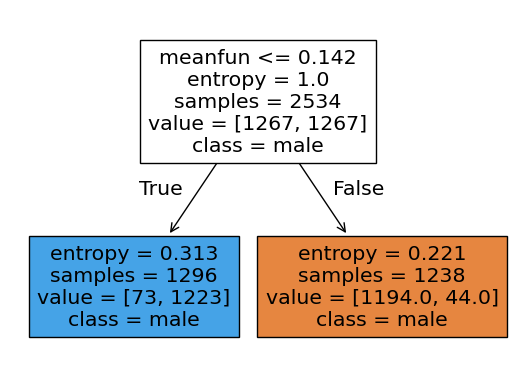

In [75]:
# Задание 7.1
# Создайте модель дерева решений максимальной глубины 1. В качестве критерия информативности используйте энтропию Шеннона
# Обучите модель на тренировочной выборке и визуализируйте её в виде графа
dt_1 = tree.DecisionTreeClassifier(max_depth=1, criterion='entropy')
dt_1.fit(X_train, y_train)
tree.plot_tree(dt_1,
               feature_names=X.columns,
               class_names=y,
               filled=True,
               impurity=True);
y_pred_1 = dt_1.predict(X_test)
print(round(metrics.accuracy_score(y_test, y_pred_1), 3))

0.962


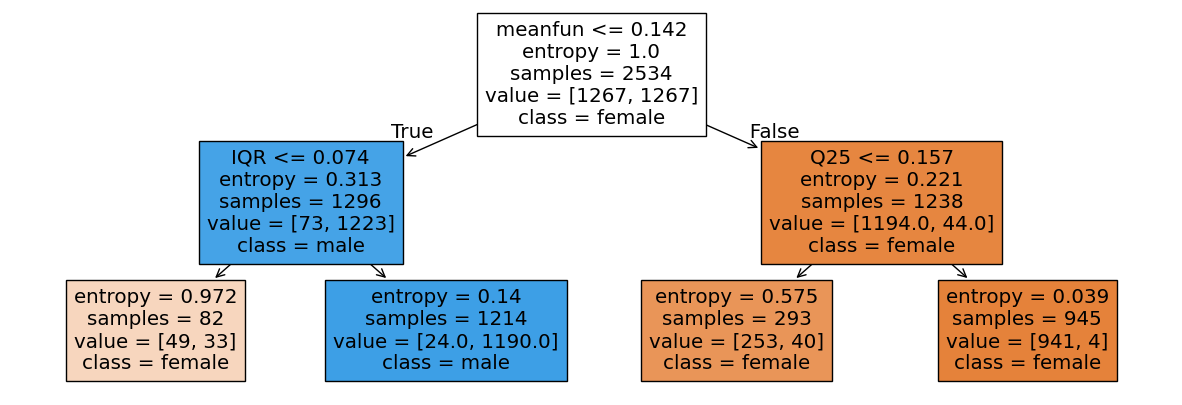

In [98]:
# Задание 7.2
# Создайте дерево решений с максимальной глубиной 2. В качестве критерия информативности используйте энтропию Шеннона
# Обучите модель на тренировочной выборке и визуализируйте её в виде графа
dt_2 = tree.DecisionTreeClassifier(max_depth=2, criterion='entropy')
dt_2.fit(X_train, y_train)
fig = plt.figure(figsize=(15, 5))
tree.plot_tree(dt_2,
               feature_names=X.columns,
               class_names=dt_2.classes_,
               filled=True,
               impurity=True);
y_pred_2 = dt_2.predict(X_test)
print(round(metrics.accuracy_score(y_test, y_pred_2), 3))

In [103]:
# Задание 7.3
# Создайте дерево решений, не ограничивая его максимальную глубину. В качестве критерия информативности используйте энтропию Шеннона
# В качестве значения параметра random_state возьмите 0
# Обучите модель на тренировочной выборке
dt_max = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_max.fit(X_train, y_train)
print(dt_max.get_depth())
print(dt_max.get_n_leaves())
y_train_pred_max = dt_max.predict(X_train)
y_test_pred_max = dt_max.predict(X_test)
print(round(metrics.accuracy_score(y_train, y_train_pred_max), 3))
print(round(metrics.accuracy_score(y_test, y_test_pred_max), 3))

12
54
1.0
0.973


In [108]:
# Задание 7.4
# Задана следующая сетка параметров:
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}
# В качестве кросс-валидатора будем использовать k-fold-валидатор со стратификацией (StratifiedKFold):
cv = model_selection.StratifiedKFold(n_splits=5)
# С помощью Grid SearchCV из модуля model_selection библиотеки sklearn переберите гиперпараметры дерева решений из приведённой сетки на обучающей выборке 
# и найдите оптимальные. Параметр random_state для дерева решений установите равным 0. В качестве метрики качества (параметр scoring) используйте accuracy
gscv = model_selection.GridSearchCV(cv=cv,
                                    param_grid=param_grid,
                                    estimator=tree.DecisionTreeClassifier(random_state=0),
                                    scoring='accuracy',
                                    n_jobs=-1)
gscv.fit(X_train, y_train)
print(gscv.best_params_)
y_train_pred_opt = gscv.predict(X_train)
y_test_pred_opt = gscv.predict(X_test)
print(round(metrics.accuracy_score(y_train, y_train_pred_opt), 3))
print(round(metrics.accuracy_score(y_test, y_test_pred_opt), 3))

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}
0.996
0.97


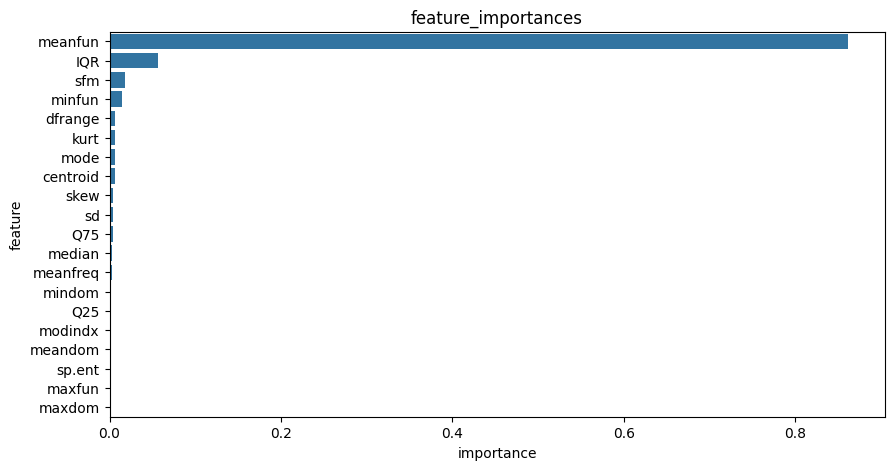

In [153]:
# Задание 7.5
# Для оптимального дерева решений, построенного в задании 7.4, найдите важность каждого из факторов. Визуализируйте её в виде столбчатой диаграммы.
fi_df = pd.DataFrame({'importance': gscv.best_estimator_.feature_importances_,
                      'feature': gscv.feature_names_in_})
fig = plt.figure(figsize=(10, 5))
sns.barplot(fi_df.sort_values(by='importance', ascending=False),
            y='feature',
            x='importance')
plt.title('feature_importances')
plt.show()